In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="2hfKcEi1yrWCV0yLZky9")
project = rf.workspace("255").project("mias_updated")
dataset = project.version(1).download("retinanet")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to mias_Updated-1 in retinanet:: 100%|██████████| 1315/1315 [00:00<00:00, 7570.48it/s]


Clone repo

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet
%cd keras-retinanet
!pip install .
!python setup.py build_ext --inplace

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6220, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 6220 (delta 5), reused 6 (delta 2), pack-reused 6205
Receiving objects: 100% (6220/6220), 13.48 MiB | 22.09 MiB/s, done.
Resolving deltas: 100% (4205/4205), done.
/content/keras-retinanet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp38-cp38-linux_x86_64.whl si

# Train

In [ ]:
!keras_retinanet/bin/train.py --weights '/content/drive/Shared drives/DATA298B/Data/data_with_shed/rushi/fdata/snapshots/resnet50_coco_best_v2.1.0.h5'  --snapshot-path '/content/drive/Shared drives/DATA298B/Data/data_with_shed/rushi/fdata/mias_fsnap'  --steps 500 --epochs 50 csv '/content/drive/Shareddrives/Personal/mias_data/train/_annotations.csv' '/content/drive/Shared drives/DATA298B/Data/data_with_shed/rushi/fdata/b_classes.csv' 

Creating model, this may take a second...
2022-12-04 05:19:02.111880: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)           

Resume training

In [ ]:
!keras_retinanet/bin/train.py --snapshot '/content/drive/Shared drives/DATA298B/Data/data_with_shed/rushi/fdata/mias_fsnap/resnet50_csv_50.h5'  --snapshot-path '/content/drive/Shared drives/DATA298B/Data/data_with_shed/rushi/fdata/mias_fsnap' --initial-epoch 50 --steps 500 --epochs 70 csv '/content/drive/Shareddrives/Personal/mias_data/train/_annotations.csv' '/content/drive/Shared drives/DATA298B/Data/data_with_shed/rushi/fdata/b_classes.csv' 

Loading model, this may take a second...
2022-12-04 08:05:27.326864: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (None, None, None,   9408        ['input_1[0][0]']                
                                64)                                                               
                               

Convert to Inference Model

In [ ]:
!keras_retinanet/bin/convert_model.py '/content/drive/Shared drives/DATA298B/Data/data_with_shed/rushi/fdata/mias_fsnap/resnet50_csv_63.h5' '/content/drive/Shareddrives/Personal/mias_data/inference/model.h5'

# Model Evaluation

Validation

In [ ]:
!keras_retinanet/bin/evaluate.py   --iou-threshold '0.5'   csv '/content/drive/Shareddrives/Personal/mias_data/valid/_annotations.csv' '/content/drive/Shared drives/DATA298B/Data/data_with_shed/rushi/fdata/b_classes.csv' '/content/drive/Shareddrives/Personal/mias_data/inference/model.h5'

Loading model, this may take a second...
2022-12-04 08:49:38.588129: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (223 of 223) |######| Elapsed Time: 0:00:27 Time:  0:00:27
Parsing annotations: 100% (223 of 223) |##| Elapsed Time: 0:00:00 Time:  0:00:00
47 instances of class ARCH with average precision: 0.9144
28 instances of class ASYM with average precision: 0.8929
49 instances of class CALC with average precision: 0.5700
45 instances of class CIRC with average precision: 0.9517
28 instances of class MISC with average precision: 1.0000
39 instances of class SPIC with average precision: 0.9668
Inference time for 223 images: 0.1018
mAP using the weighted average of precisions among classes: 0.8663
mAP: 0.8826


Test

In [ ]:
!keras_retinanet/bin/evaluate.py   --iou-threshold '0.5'   csv '/content/drive/Shareddrives/Personal/mias_data/test/_annotations.csv' '/content/drive/Shared drives/DATA298B/Data/data_with_shed/rushi/fdata/b_classes.csv' '/content/drive/Shareddrives/Personal/mias_data/inference/model.h5'

Loading model, this may take a second...
2022-12-04 08:50:31.355825: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (108 of 108) |######| Elapsed Time: 0:00:15 Time:  0:00:15
Parsing annotations: 100% (108 of 108) |##| Elapsed Time: 0:00:00 Time:  0:00:00
17 instances of class ARCH with average precision: 0.7976
17 instances of class ASYM with average precision: 0.9294
28 instances of class CALC with average precision: 0.5357
19 instances of class CIRC with average precision: 1.0000
17 instances of class MISC with average precision: 0.9412
16 instances of class SPIC with average precision: 0.8750
Inference time for 108 images: 0.1249
mAP using the weighted average of precisions among classes: 0.8189
mAP: 0.8465


In [ ]:
from keras_retinanet.models import load_model

model = load_model('/content/drive/Shareddrives/Personal/mias_data/inference/model.h5')
print(model.summary())

Model: "retinanet-bbox"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (None, None, None,   9408        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, None, None,   256         ['conv1[0][0]']                  
                                64)                                                  

In [ ]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

In [ ]:
labels_to_names = {0: 'ARCH', 1:'ASYN', 2: 'CALC', 3:' CIRC', 4: 'MISC' , 5: 'SPIC' }

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


processing time:  0.13472199440002441


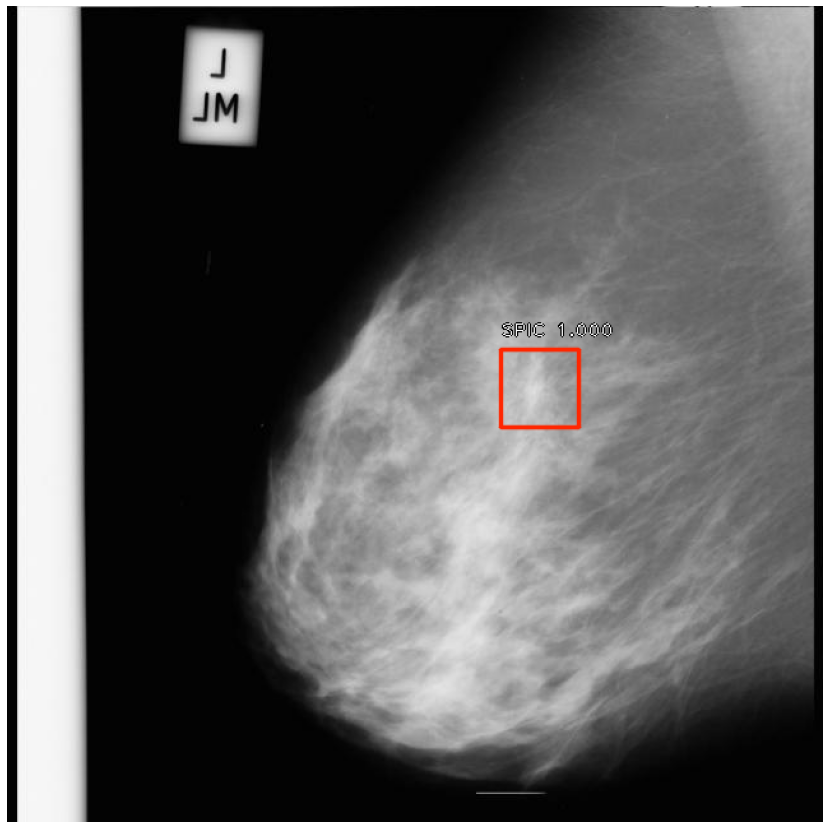

In [ ]:
#Screenshot 2022-09-26 132114
# load image
image = read_image_bgr('/content/drive/Shareddrives/Personal/mias_data/valid/mdb1453442_jpg.rf.c623670095faa18931238aa18b7e1f74.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

processing time:  0.14611577987670898


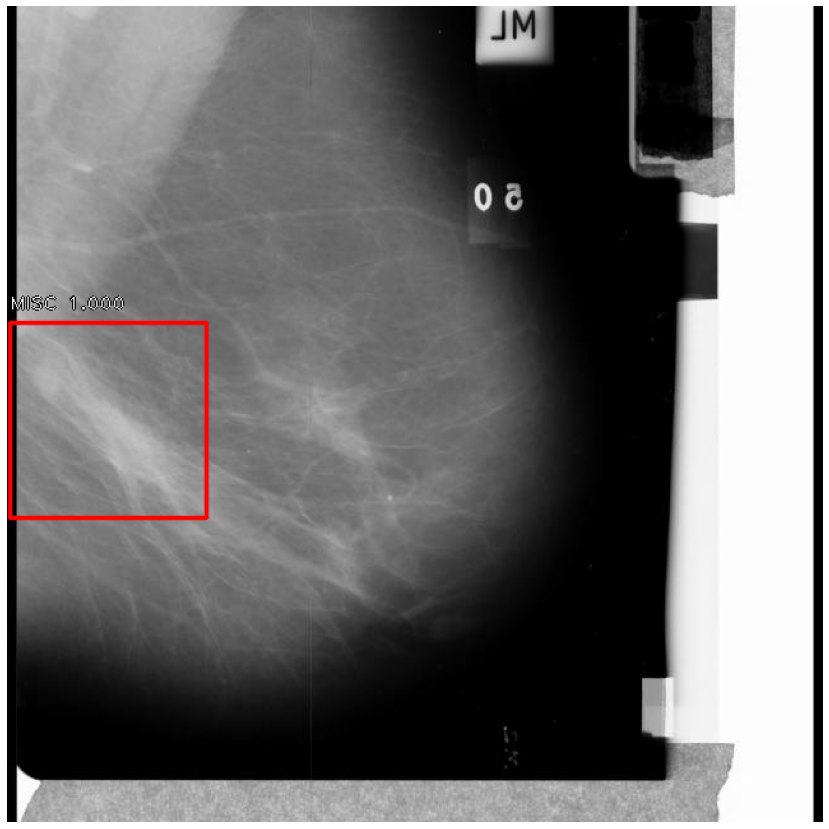

In [ ]:
#Screenshot 2022-09-26 132114
# load image
image = read_image_bgr('/content/drive/Shareddrives/Personal/mias_data/valid/mdb2743946_jpg.rf.309956267437ef66dfa4b99a0ed0ec51.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

processing time:  0.13107967376708984


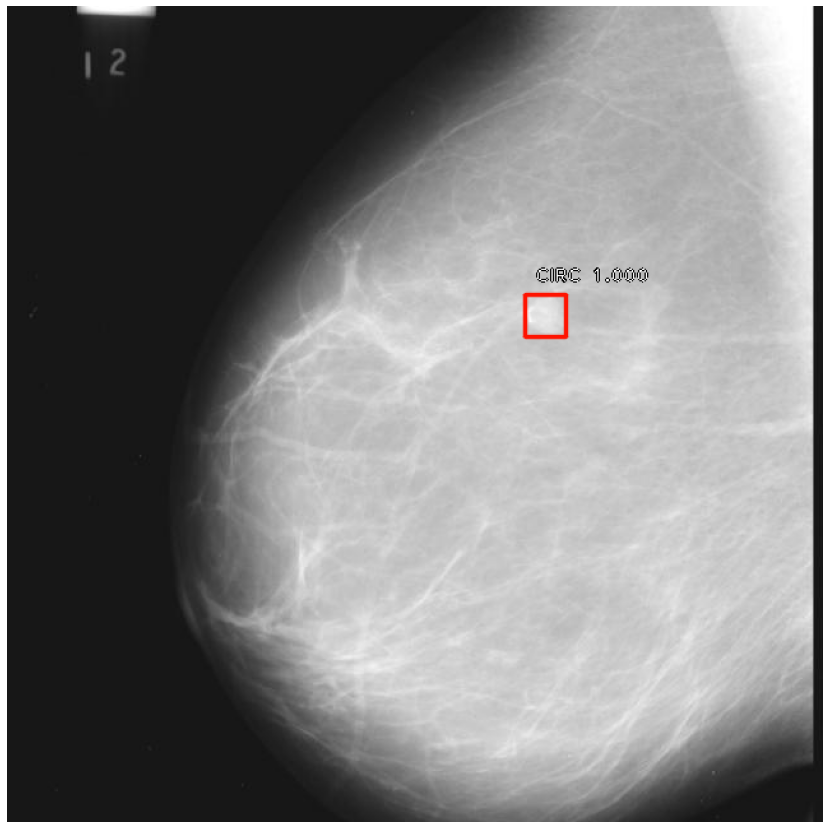

In [ ]:
#Screenshot 2022-09-26 132114
# load image
image = read_image_bgr('/content/drive/Shareddrives/Personal/mias_data/valid/mdb1423431_jpg.rf.09c7ae87be18c5f1b799d9c72c24a5ae.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

processing time:  0.1384139060974121


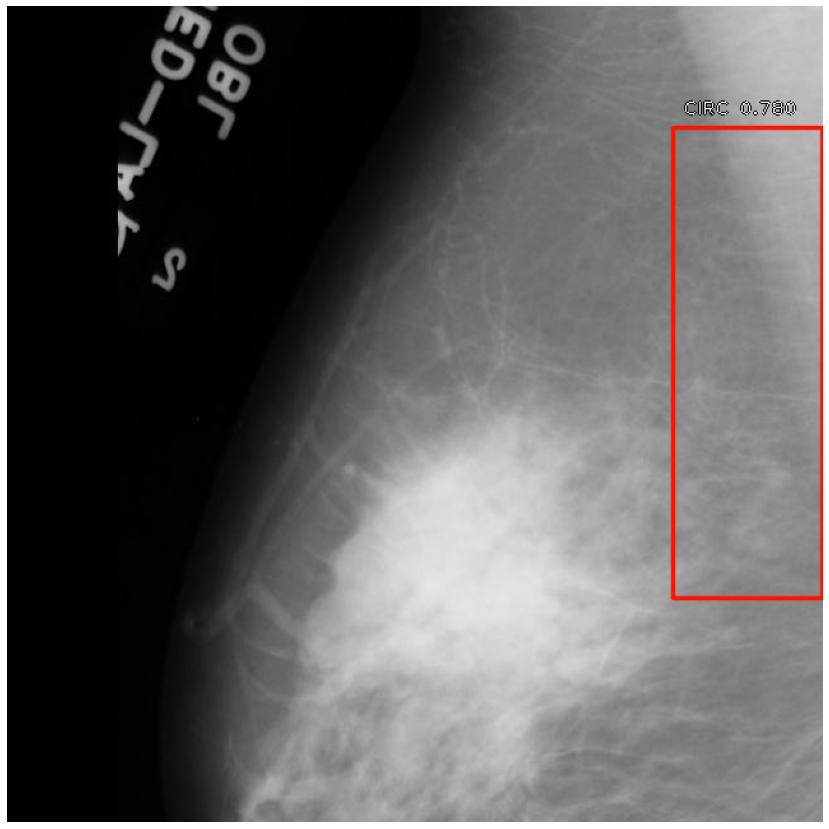

In [ ]:
#Screenshot 2022-09-26 132114
# load image
image = read_image_bgr('/content/drive/Shareddrives/Personal/mias_data/valid/mdb0813194_jpg.rf.89b5838354c8810439e606348f665106.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()